In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use("ggplot")


In [14]:
df = pd.read_csv("Housing.csv")   # Adjust path if needed
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
yes_no_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]

for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].map({"yes": 1, "no": 0})


In [17]:
if "furnishingstatus" in df.columns:
    df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [18]:
X_simple = df[["area"]]
y = df["price"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

y_pred_s = simple_model.predict(X_test_s)


In [19]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_s, mse_s, rmse_s, r2_s = evaluate(y_test_s, y_pred_s)

print("Simple Linear Regression:")
print(f"MAE  : {mae_s:.2f}")
print(f"MSE  : {mse_s:.2f}")
print(f"RMSE : {rmse_s:.2f}")
print(f"R²   : {r2_s:.4f}")


Simple Linear Regression:
MAE  : 1474748.13
MSE  : 3675286604768.19
RMSE : 1917103.70
R²   : 0.2729


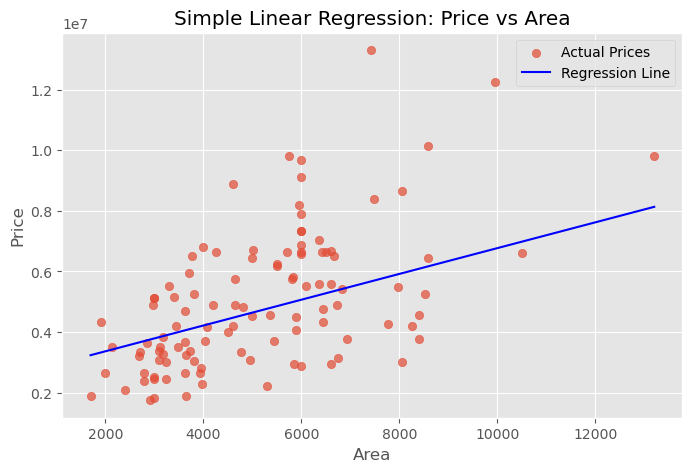

In [20]:
sorted_idx = X_test_s["area"].argsort()
X_sorted = X_test_s.iloc[sorted_idx]
y_sorted_pred = y_pred_s[sorted_idx]

plt.figure(figsize=(8,5))
plt.scatter(X_test_s, y_test_s, label="Actual Prices", alpha=0.7)
plt.plot(X_sorted, y_sorted_pred, color="blue", label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Price vs Area")
plt.legend()
plt.show()


In [21]:
print("Intercept:", simple_model.intercept_)
print("Slope for Area:", simple_model.coef_[0])


Intercept: 2512254.2639593435
Slope for Area: 425.72984193878284


In [22]:
feature_cols = ["area", "bedrooms", "bathrooms", "stories", "parking",
                "airconditioning", "mainroad"]

feature_cols = [col for col in feature_cols if col in df.columns]

X_multi = df[feature_cols]
y_multi = df["price"]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

y_pred_m = multi_model.predict(X_test_m)


In [23]:
mae_m, mse_m, rmse_m, r2_m = evaluate(y_test_m, y_pred_m)

print("\nMultiple Linear Regression:")
print("Features:", feature_cols)
print(f"MAE  : {mae_m:.2f}")
print(f"MSE  : {mse_m:.2f}")
print(f"RMSE : {rmse_m:.2f}")
print(f"R²   : {r2_m:.4f}")



Multiple Linear Regression:
Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'airconditioning', 'mainroad']
MAE  : 1071632.90
MSE  : 2022301254430.78
RMSE : 1422076.39
R²   : 0.5999


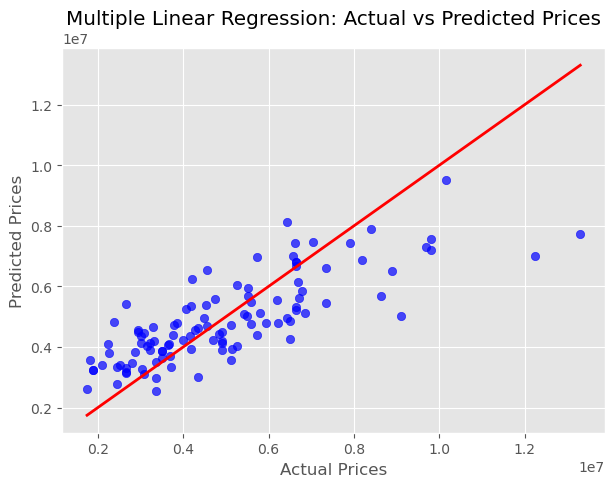

In [25]:
plt.figure(figsize=(7,5))
plt.scatter(y_test_m, y_pred_m, alpha=0.7, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Linear Regression: Actual vs Predicted Prices")
plt.plot([y_test_m.min(), y_test_m.max()],
         [y_test_m.min(), y_test_m.max()],
         color='red', linewidth=2)   # perfect prediction line
plt.show()


In [24]:
print("Intercept:", multi_model.intercept_)
print("\nCoefficients:")
for col, coef in zip(feature_cols, multi_model.coef_):
    print(f"{col:15} -> {coef:.4f}")


Intercept: -114467.72936963476

Coefficients:
area            -> 257.8719
bedrooms        -> 164786.7173
bathrooms       -> 1148173.9835
stories         -> 327899.2806
parking         -> 253046.9215
airconditioning -> 871594.8797
mainroad        -> 611932.9615
